In [1]:
import multiprocessing

from model import feature_selection_with_nsga2, get_toolbox

model_name = '5NN'
dataset_name = 'vehicle'
setting = 0.3

with multiprocessing.Pool() as pool:
    toolbox = get_toolbox(model_name, dataset_name, setting, pool)
    gens, _ = feature_selection_with_nsga2(toolbox)

Evolving on vehicle with 5NN under setiing of 0.3.


Generation 256/256:|██████████|[00:31<00:00, 8.21it/s]


In [2]:
from utils import sort_population

pop = sort_population(gens[-1])

accuracy = pop[0].fitness.values[0]
dim_reduction = pop[0].fitness.values[1]
print(f"Dimension reduction: {dim_reduction}")
print(f"Accuracy: {accuracy}\n")

Dimension reduction: 0.6666666666666666
Accuracy: 0.7716535433070866



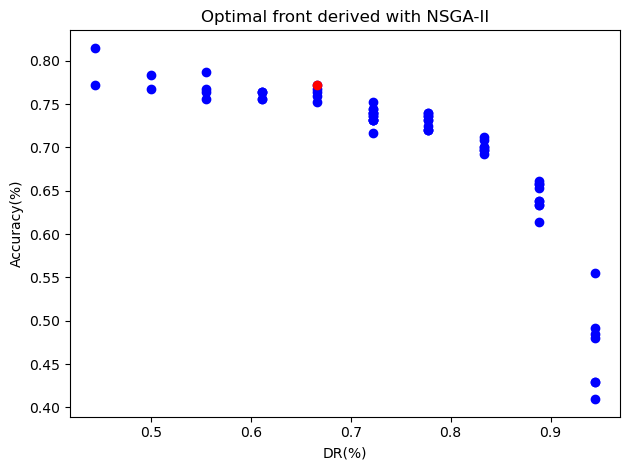

In [3]:
import matplotlib.pyplot as plt
import numpy

front = numpy.asarray([ind.fitness.values for ind in pop])
plt.title('Optimal front derived with NSGA-II', fontsize=12)

accuracy = list(map(lambda x: x[0], front))
dim_reduction = list(map(lambda x: x[1], front))
plt.scatter(dim_reduction, accuracy, c="b")
plt.scatter(dim_reduction[0], accuracy[0], c="r")

plt.xlabel('DR(%)')
plt.ylabel('Accuracy(%)')

plt.tight_layout()
plt.show()